<a href="https://colab.research.google.com/github/PradeepaArul/Data-Science/blob/main/DataScience_VAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [225]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

In [226]:
# Load dataset
df = pd.read_csv('Ev.csv')

In [227]:
# print 5 records from dataset
df.head(5)

,Model_Year,Make,Model,Vehicle Class,Motor_(kW),Transmission,Fuel_Type,Range_(km),terminal_voltage,terminal_current,temperature,charge_current,charge_voltage,time,capacity,cycle,SOH
0,2012,Mitsubishi,i-MiEV,Subcompact,49,A1,B,100,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000,1.856487,1,0.928244
1,2012,Nissan,LEAF,Mid-size,80,A1,B,117,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781,1.856487,1,0.928244
2,2013,Ford,Focus Electric,Compact,107,A1,B,122,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703,1.856487,1,0.928244
3,2013,Mitsubishi,i-MiEV,Subcompact,49,A1,B,100,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781,1.856487,1,0.928244
4,2013,Nissan,LEAF,Mid-size,80,A1,B,117,4.189773,0.000021,24.697752,-0.0006,0.000,0.000,1.846327,2,0.923164


In [228]:
# print various attributes available in the dataset
df.columns

Index(['Model_Year', 'Make', 'Model', 'Vehicle Class', 'Motor_(kW)',
       'Transmission', 'Fuel_Type', 'Range_(km)', 'terminal_voltage',
       'terminal_current', 'temperature', 'charge_current', 'charge_voltage',
       'time', 'capacity', 'cycle', 'SOH'],
      dtype='object')

In [229]:
# print properties of attributes in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Model_Year        310 non-null    int64  
 1   Make              310 non-null    object 
 2   Model             310 non-null    object 
 3   Vehicle Class     310 non-null    object 
 4   Motor_(kW)        310 non-null    int64  
 5   Transmission      310 non-null    object 
 6   Fuel_Type         310 non-null    object 
 7   Range_(km)        310 non-null    int64  
 8   terminal_voltage  310 non-null    float64
 9   terminal_current  310 non-null    float64
 10  temperature       310 non-null    float64
 11  charge_current    310 non-null    float64
 12  charge_voltage    310 non-null    float64
 13  time              310 non-null    float64
 14  capacity          310 non-null    float64
 15  cycle             310 non-null    int64  
 16  SOH               310 non-null    float64
dt

In [230]:
# Drop rows with missing values
df.dropna(inplace=True)

In [231]:
# Encode categorical variables if any
df = pd.get_dummies(df)

In [232]:
# Split into features and target
X = df.drop('SOH', axis=1)
y = df['SOH']

In [233]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [234]:
# Feature Scaling
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [235]:
# Define models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "Ridge Regression": Ridge(alpha=1.0),
    "Support Vector Machine": SVR(kernel='rbf')
}

In [236]:
# Metric storage
r2_scores = {}
mse_scores = {}
mae_scores = {}
rmse_scores = {}


In [237]:
# Helper: SOH category
def categorize_soh(value):
    if value >= 80:
        return "High"
    elif value >= 50:
        return "Medium"
    else:
        return "Low"


Random Forest Results:
R2 Score: 0.9999002480006852
MSE: 7.816386088070936e-07


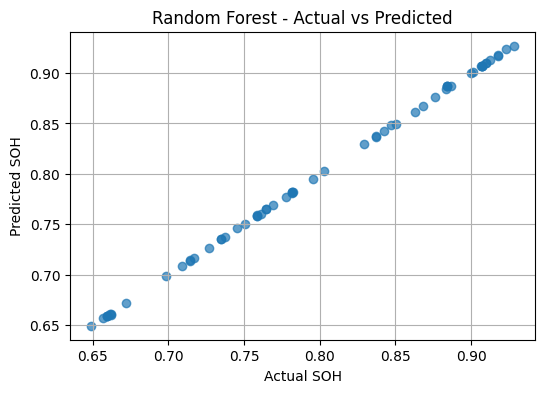

In [238]:
# 6. Train Models
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
evaluate_model(rf, "Random Forest")



XGBoost Results:
R2 Score: 0.999991980463938
MSE: 6.283963282767292e-08


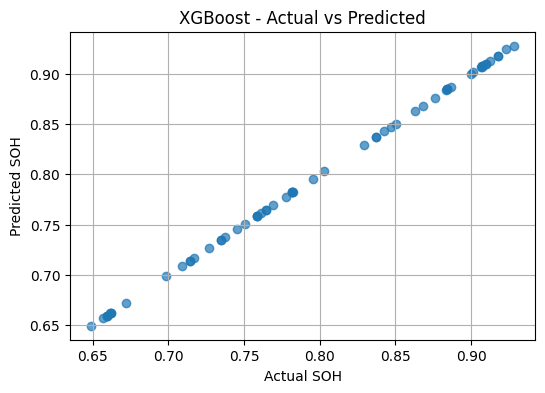

In [239]:
# XGBoost
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
evaluate_model(xgb, "XGBoost")



Ridge Regression Results:
R2 Score: 0.9815368879667415
MSE: 0.00014467360356751468


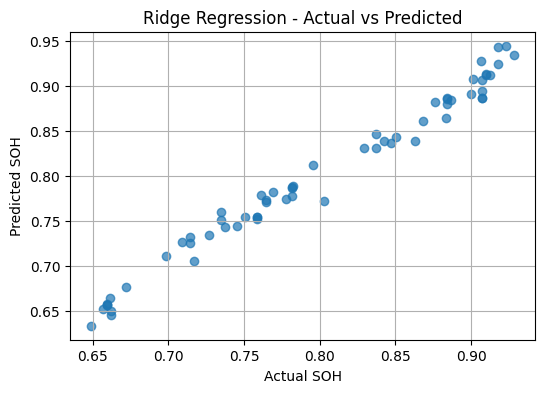

In [240]:
# Ridge Regression (as Logistic Regression variant for regression)
ridge = Ridge(alpha=1.0)
evaluate_model(ridge, "Ridge Regression")




Support Vector Machine Results:
R2 Score: 0.36991960441442817
MSE: 0.004937195918131585


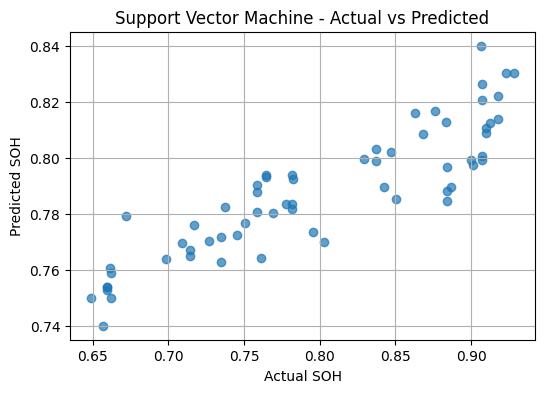

In [241]:
# Support Vector Machine
svm = SVR(kernel='rbf')
evaluate_model(svm, "Support Vector Machine")



In [247]:
def evaluate_model_with_metrics(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Store metrics
    r2_scores[name] = r2_score(y_test, y_pred)
    mse_scores[name] = mean_squared_error(y_test, y_pred)
    mae_scores[name] = mean_absolute_error(y_test, y_pred)
    rmse_scores[name] = np.sqrt(mean_squared_error(y_test, y_pred))  # Corrected line

    # Confusion matrix visualization
    y_true_cat = pd.Series(y_test).apply(categorize_soh)
    y_pred_cat = pd.Series(y_pred).apply(categorize_soh)
    cm = confusion_matrix(y_true_cat, y_pred_cat, labels=["High", "Medium", "Low"])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["High", "Medium", "Low"])
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


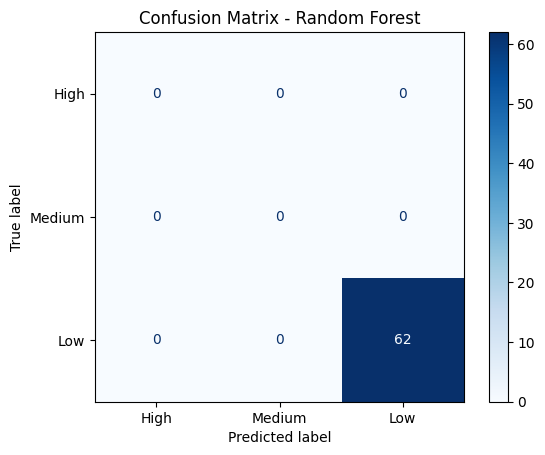

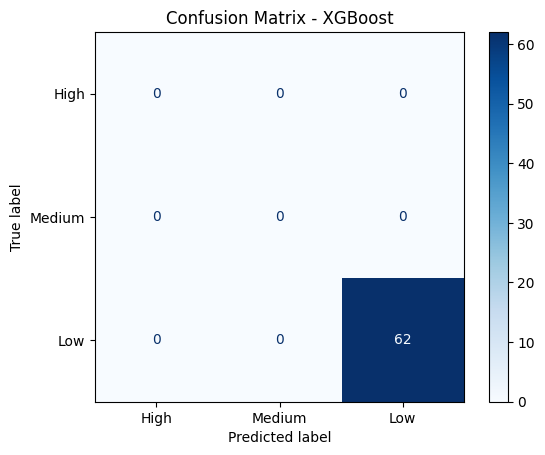

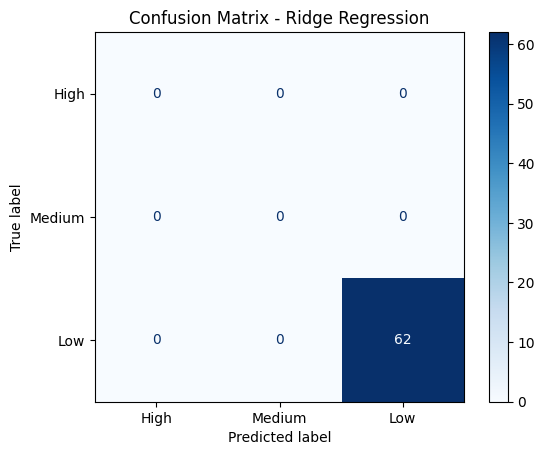

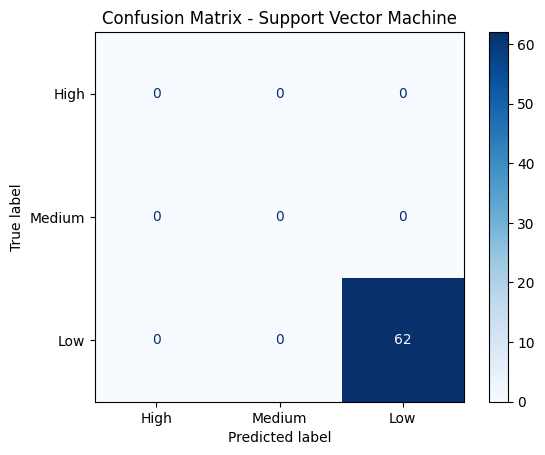

In [248]:
# Evaluate base models
for name, model in models.items():
    evaluate_model_with_metrics(model, name)


Best Random Forest Parameters: {'max_depth': None, 'n_estimators': 150}


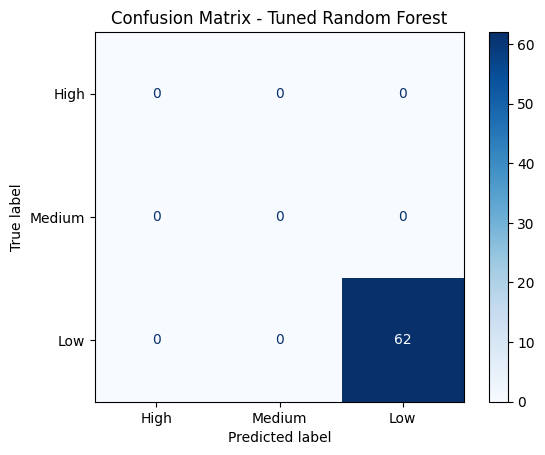

In [251]:
# Hyperparameter tuning: Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20]
}
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=3, scoring='r2')
grid_search_rf.fit(X_train, y_train)
print("\nBest Random Forest Parameters:", grid_search_rf.best_params_)

best_rf = grid_search_rf.best_estimator_
evaluate_model_with_metrics(best_rf, "Tuned Random Forest")



Best XGBoost Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 50}


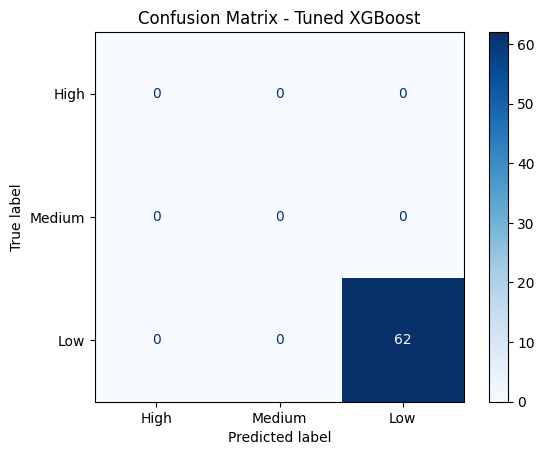

In [253]:
# Hyperparameter tuning: XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
grid_search_xgb = GridSearchCV(XGBRegressor(random_state=42), param_grid_xgb, cv=3, scoring='r2')
grid_search_xgb.fit(X_train, y_train)
print("\nBest XGBoost Parameters:", grid_search_xgb.best_params_)

best_xgb = grid_search_xgb.best_estimator_
evaluate_model_with_metrics(best_xgb, "Tuned XGBoost")

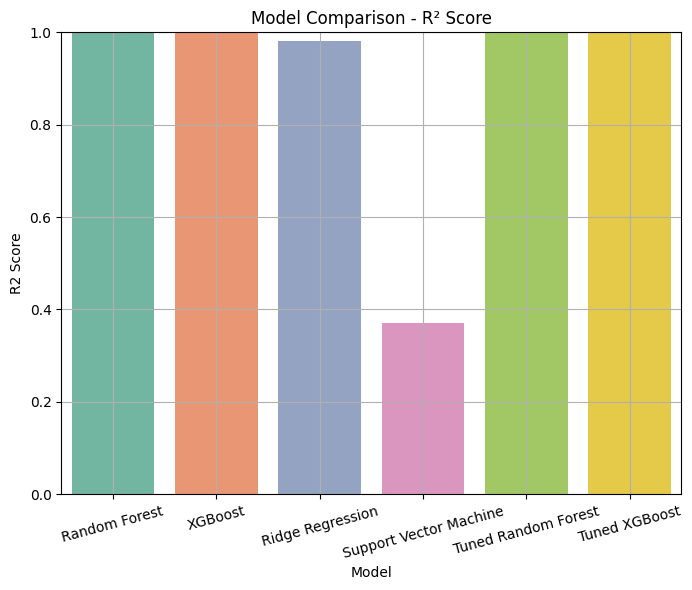

In [256]:
# Plot R² Scores
r2_df = pd.DataFrame({'Model': list(r2_scores.keys()), 'R2 Score': list(r2_scores.values())})
plt.figure(figsize=(8, 6))
sns.barplot(data=r2_df, x='Model', y='R2 Score', hue='Model', palette='Set2', legend=False)
plt.title("Model Comparison - R² Score")
plt.xticks(rotation=15)
plt.ylim(0, 1)
plt.grid(True)
plt.show()


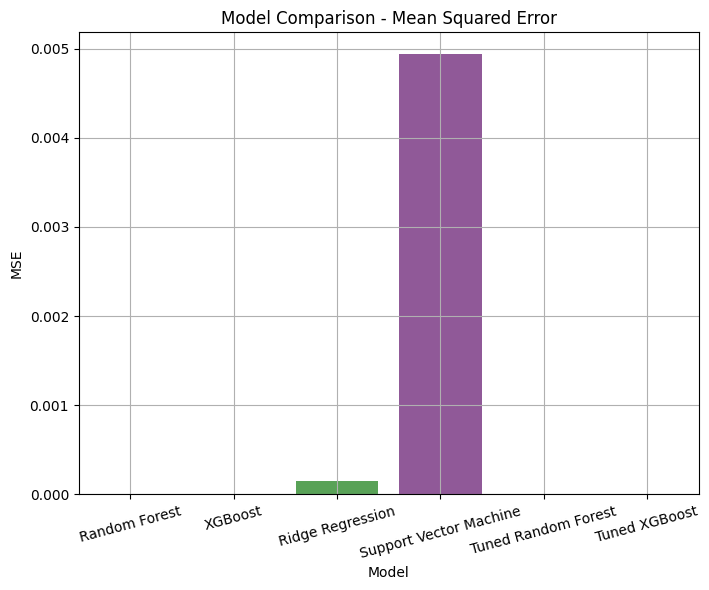

In [258]:
# Plot MSE
mse_df = pd.DataFrame({'Model': list(mse_scores.keys()), 'MSE': list(mse_scores.values())})
plt.figure(figsize=(8, 6))
sns.barplot(data=mse_df, x='Model', y='MSE', hue='Model', palette='Set1', legend=False)
plt.title("Model Comparison - Mean Squared Error")
plt.xticks(rotation=15)
plt.grid(True)
plt.show()

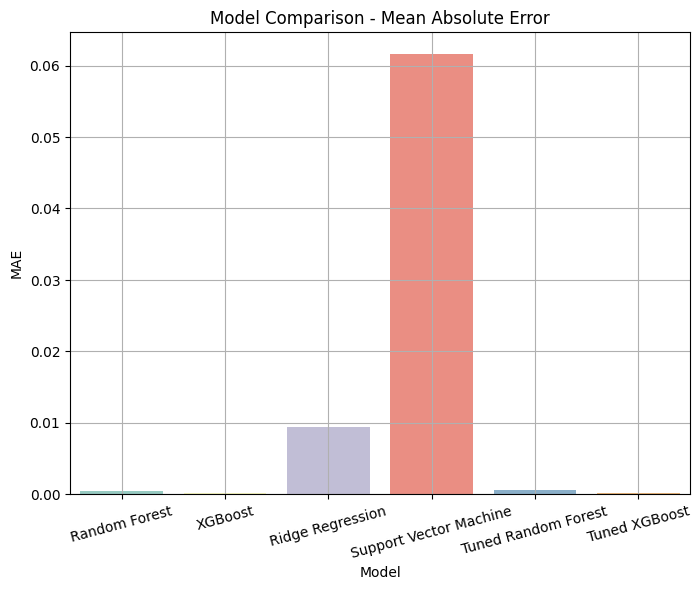

In [260]:
# Plot MAE
mae_df = pd.DataFrame({'Model': list(mae_scores.keys()), 'MAE': list(mae_scores.values())})
plt.figure(figsize=(8, 6))
sns.barplot(data=mae_df, x='Model', y='MAE', hue='Model', palette='Set3', legend=False)
plt.title("Model Comparison - Mean Absolute Error")
plt.xticks(rotation=15)
plt.grid(True)
plt.show()


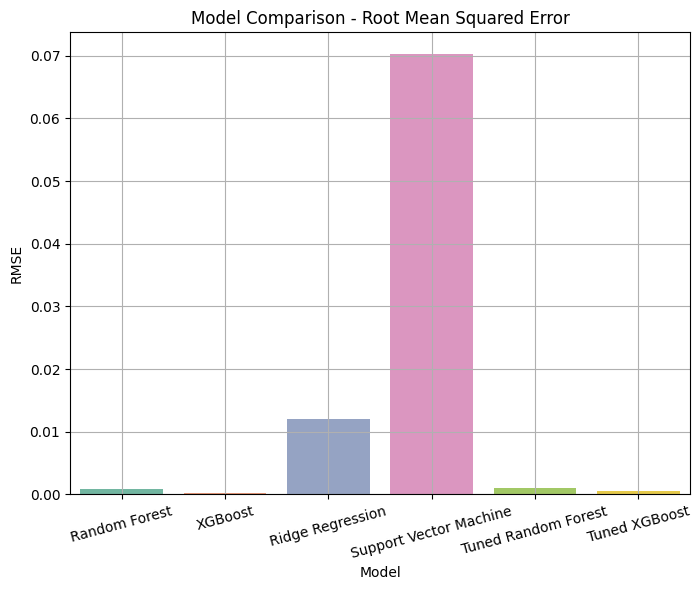

In [262]:
# Plot RMSE
rmse_df = pd.DataFrame({'Model': list(rmse_scores.keys()), 'RMSE': list(rmse_scores.values())})
plt.figure(figsize=(8, 6))
sns.barplot(data=rmse_df, x='Model', y='RMSE', hue='Model', palette='Set2', legend=False)
plt.title("Model Comparison - Root Mean Squared Error")
plt.xticks(rotation=15)
plt.grid(True)
plt.show()


In [263]:
# Summary Table
summary_df = pd.DataFrame({
    'Model': r2_scores.keys(),
    'R2 Score': r2_scores.values(),
    'MSE': mse_scores.values(),
    'MAE': mae_scores.values(),
    'RMSE': rmse_scores.values()
}).sort_values(by='R2 Score', ascending=False)

print("\nModel Performance Summary:\n")
print(summary_df)


Model Performance Summary:

                    Model  R2 Score           MSE       MAE      RMSE
1                 XGBoost  0.999992  6.283963e-08  0.000116  0.000251
5           Tuned XGBoost  0.999975  1.953481e-07  0.000227  0.000442
0           Random Forest  0.999900  7.816386e-07  0.000517  0.000884
4     Tuned Random Forest  0.999890  8.584664e-07  0.000532  0.000927
2        Ridge Regression  0.981537  1.446736e-04  0.009442  0.012028
3  Support Vector Machine  0.369920  4.937196e-03  0.061602  0.070265
